<a href="https://colab.research.google.com/github/MuntahaZaigham1/ds_assign2/blob/master/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import plotly

In [0]:
data = np.loadtxt('/content/polynomialRegressionData.csv', delimiter=',')
#X_train = data[:,1] #the feature_set
#y_train = data[:,2] #the labels
No_of_cols = data.shape[1]

X_train1 = data[:,[No_of_cols - 3]] #feature set
X_train2 = data[:,[No_of_cols - 2]] #feature set

y_train = data[:, [No_of_cols - 1]] #label set

print(X_train2)


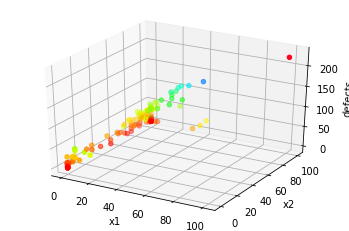

In [33]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = y_train
x_points = X_train1
y_points = X_train2
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('defects')

plt.show()

In [0]:
def hypothesis(theta, X):
    h = np.ones((X.shape[0],1))
    #print(h)
   
    for i in range(0,X.shape[0]):
        x = np.concatenate((np.ones(1), np.array(X[i])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(X.shape[0])
    return h

In [0]:
def SGD(theta, alpha, num_iters, h, X, y):
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha) * (h - y)
        theta[1] = theta[1] - (alpha) * ((h - y) * X)
        h = theta[1]*X + theta[0] 
    return theta

In [0]:
def sgd_linear_regression(X, y, alpha, num_iters):
    # initializing the parameter vector...
    theta = np.zeros(2)
    # hypothesis calculation....
    h = hypothesis(theta, X)    
    # returning the optimized parameters by Gradient Descent...
    for i in range(0, X.shape[0]):
        theta = SGD(theta,alpha,num_iters,h[i],X[i],y[i])
    theta = theta.reshape(1, 2)
    return theta

In [0]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 100000
theta = sgd_linear_regression(X_train1, y_train, 0.0001, 100000)

Text(0, 0.5, 'defects')

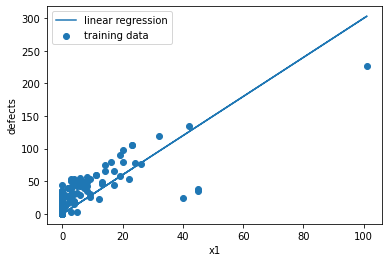

In [55]:
import matplotlib.pyplot as plt 
# getting the predictions...
training_predictions = hypothesis(theta, X_train1)
scatter = plt.scatter(X_train1, y_train, label="training data")
regression_line = plt.plot(X_train1, training_predictions
                           , label="linear regression")
plt.legend()
plt.xlabel('x1')
plt.ylabel('defects')

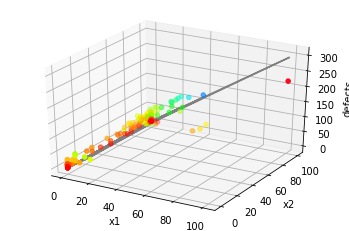

In [56]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = training_predictions
x_line = X_train1
y_line = X_train2
ax.plot3D(x_line, y_line, z_line, 'gray')
z_points = y_train
x_points = X_train1
y_points = X_train2
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('defects')

plt.show()